In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('final_data.csv')
#reads the values of the sentiment and loads into df

In [4]:
df = df.dropna()
df = df.set_index(['Unnamed: 0'])

In [5]:
df['follower_count'] = df['follower_count'] / 1000000

In [6]:
#To normalize the values
df['Positive'] = df['Positive'] * 1000
df['Negative'] = df['Negative'] * 1000
df['Anticipation'] = df['Anticipation'] * 1000
df['Disgust'] = df['Disgust'] * 1000
df['Fear'] = df['Fear'] * 1000
df['Joy'] = df['Joy'] * 1000
df['Sadness'] = df['Sadness'] * 1000
df['Surprise'] = df['Surprise'] * 1000
df['Trust'] = df['Trust'] * 1000

In [7]:
pd.options.display.max_columns = 11
df.describe()

,Anticipation,Disgust,Fear,Joy,Negative,Positive,Sadness,Surprise,Trust,follower_count,Pct_change
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,10.488975,1.702832,4.964858,4.616569,9.353808,13.891621,3.940987,3.652298,9.813697,14.140550,-0.001188
std,3.206982,1.016819,2.088546,1.988888,3.197049,4.711806,1.887132,1.503773,3.778724,22.197178,0.014607
min,1.800180,0.000000,0.900090,0.000000,4.004577,4.500450,0.000000,0.000000,2.700270,0.212332,-0.076124
25%,8.661417,1.003512,3.613207,3.364279,6.974128,11.125802,2.595839,2.631579,7.580274,4.112753,-0.008042
50%,10.335917,1.578947,4.850309,4.529136,8.902541,13.502898,3.627570,3.500583,9.493964,7.756158,-0.000095
75%,12.350371,2.104458,6.048048,5.504010,11.071289,16.488072,4.822561,4.508373,11.059934,17.318253,0.007565
max,22.809998,5.452320,14.874915,10.998945,20.607858,36.200405,10.229800,10.546934,33.593976,181.115430,0.026556


In [8]:
#here is a brief description of the dataset after scaling and adjusting for the parameters

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2016-06-15 to 2016-03-30
Data columns (total 11 columns):
Anticipation      101 non-null float64
Disgust           101 non-null float64
Fear              101 non-null float64
Joy               101 non-null float64
Negative          101 non-null float64
Positive          101 non-null float64
Sadness           101 non-null float64
Surprise          101 non-null float64
Trust             101 non-null float64
follower_count    101 non-null float64
Pct_change        101 non-null float64
dtypes: float64(11)
memory usage: 9.5+ KB


In [10]:
#covenverting percentge change to 0,1 clasification
df['tagged'] = np.where(d f['Pct_change'] < 0, 0, 1)
len(df)

101

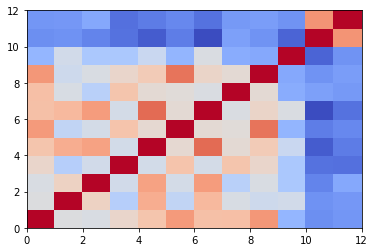

In [176]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(), cmap='coolwarm')
plot.show()

In [196]:
#train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)
x_train = train.iloc[0:, 0:10]
y_train = train['tagged']
x_test = test.iloc[0:, 0:10]
y_test = test['tagged']

In [197]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
testing_predictions = model.predict(x_test)
print(testing_predictions)

[0.62229678 0.64767211 0.48250464 0.83753904 0.54516045 0.48815379
 0.32096338 0.51092113 0.48583546 0.41904837 0.42473271 0.29712895
 0.20315062 0.22586219 0.71415796 0.3505757  0.38957785 0.78456874
 0.7658901  0.78766035 0.41266658 0.39508954 0.60989517 0.5134893
 0.61704325 0.51679162 0.27610266 0.66522717 0.65803124 0.36182821
 0.67889393]


In [199]:
# for i in range(len(testing_predictions)):
#     print(testing_predictions[i],y_train[i])

In [200]:
def get_classification(predictions, threshold):
    classes = np.zeros_like(testing_predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

In [201]:
# get_classification(testing_predictions,0.7)

In [202]:
# def get_classification(predictions,threshold):
#     classes = np.zeros_like(testing_predictions)
#     for i in range(len(classes)):
#         if predictions[i] > threshold:
#             classes[i] = 1
#     return classes

# get_classification(testing_predictions,0.5)

In [203]:
#finding threshold for max accurracy
accuracy = []
for i in range(100):
    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_test, get_classification(testing_predictions, i / 100))
    tn, fp, fn, tp = confusion_matrix(
        y_test, get_classification(testing_predictions, i / 100)).ravel()
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
x = max(accuracy)
print(x)
y = accuracy.index(x)

0.7096774193548387


In [204]:
print("Accuracy of this model found to be %f " % (x * 100))

Accuracy of this model found to be 70.967742 


In [205]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, get_classification(testing_predictions, y / 100))

array([[10,  7],
       [ 2, 12]], dtype=int64)

In [206]:
tn, fp, fn, tp = confusion_matrix(
    y_test, get_classification(testing_predictions, y / 100)).ravel()
print(tn, fp, fn, tp)

10 7 2 12


In [207]:
tpr = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Percentage of stocks correctly predicted:", tpr * 100)
print("Accuracy of the model is:", accuracy * 100)

Percentage of stocks correctly predicted: 85.71428571428571
Accuracy of the model is: 70.96774193548387


In [208]:
# from sklearn.model_selection import LeaveOneOut
# X = np.array(df.iloc[0:,0:10])
# y = df['tagged']
# loo = LeaveOneOut()
# loo.get_n_splits(X)
# accuracy=[]
# testing_validation= []
# for train_index, test_index in loo.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
#         model = linear_model.LinearRegression()
#         model.fit(X_train,y_train)
#         testing_predictions  = model.predict(X_test)
#         a=get_classification(testing_predictions,0.4)

In [79]:
# testing_validation=[float(i) for i in range(len(testing_validation))]
# len(testing_validation)

0

In [209]:
# import statsmodels.api as sm
# X = sm.add_constant(x_train)
# model = sm.OLS(y_train, x_train).fit()
# model.summary()

In [325]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train, np.ravel(y_train))
a = model.score(x_test, y_test)

In [326]:
print("accuracy of the model is %f" % (a * 100))

accuracy of the model is 70.967742


In [327]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test), y_pred)
cfm

array([[11,  6],
       [ 3, 11]], dtype=int64)

In [328]:
tn, fp, fn, tp = cfm[0][0], cfm[0][1], cfm[1][0], cfm[1][1]

In [329]:
tpr = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Percentage of stocks correctly predicted:", tpr * 100)
print("Accuracy of the model is:", accuracy * 100)

Percentage of stocks correctly predicted: 78.57142857142857
Accuracy of the model is: 70.96774193548387


Text(0.5,0,'Relative Importance')

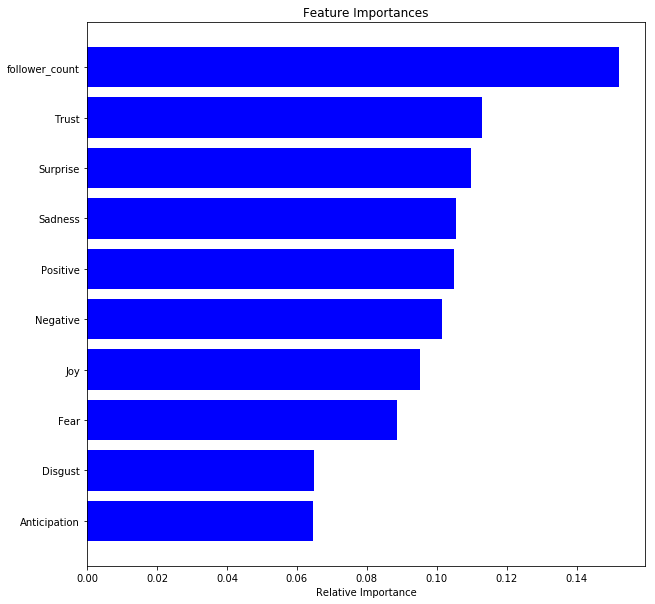

In [330]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
feature_names = df.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_names)
plt.xlabel('Relative Importance')